In [2]:
import mne
import numpy as np
import pandas as pd
%matplotlib qt
!jupyter kernelspec list


Available kernels:
  python3    /home/ccarthen/.local/share/jupyter/kernels/python3
  python2    /usr/local/share/jupyter/kernels/python2


In [17]:
# load old data
df = pd.read_csv('./Archive/Emotional-Colorsopenbci_eeg.csv')
df.columns = df.columns.str.replace("'",'')

# create the channels in mne -TODO make a function -- difficulty eash
channels = ['Fp1','Fp2','C3','C4','T5','T6','O1','O2','F7','F8','F3','F4','T3','T4','P3','P4']
print(df[channels])

df2 = pd.read_csv('./P38/Emotional-Colorsopenbci_eeg.csv')
df2.columns = df.columns.str.replace("'",'')


info = mne.create_info(ch_names=channels,ch_types='eeg',sfreq=250)

data = df[channels].transpose()
data = mne.io.RawArray(data,info)
data2 = mne.make_fixed_length_epochs(data,duration=30)


dataf1 = df2[channels].transpose()
dataf1 = mne.io.RawArray(dataf1,info)
dataf2 = mne.make_fixed_length_epochs(dataf1,duration=30)

               Fp1           Fp2           C3           C4           T5  \
0     -4135.251465 -16866.603516  1811.988892  1539.074097 -5551.837891   
1     -4140.683105 -16868.615234  1817.129761  1562.073975 -5550.966309   
2     -4132.546875 -16859.876953  1795.783813  1537.487061 -5539.745605   
3     -4132.681152 -16861.529297  1807.585571  1543.589111 -5546.786621   
4     -4130.982422 -16858.958984  1782.439819  1528.546387 -5545.333496   
...            ...           ...          ...          ...          ...   
55974 -5924.061523 -18258.134766  5887.941406  3796.846191 -6162.957031   
55975 -5926.609863 -18260.123047  5911.477539  3804.803467 -6161.548828   
55976 -5921.513672 -18250.847656  5906.984863  3786.921875 -6169.886230   
55977 -5934.276367 -18258.916016  5915.076172  3806.301025 -6174.312012   
55978 -5931.035156 -18265.689453  5907.521484  3786.541992 -6175.339844   

                T6           O1           O2           F7            F8  \
0      4606.068848  9306

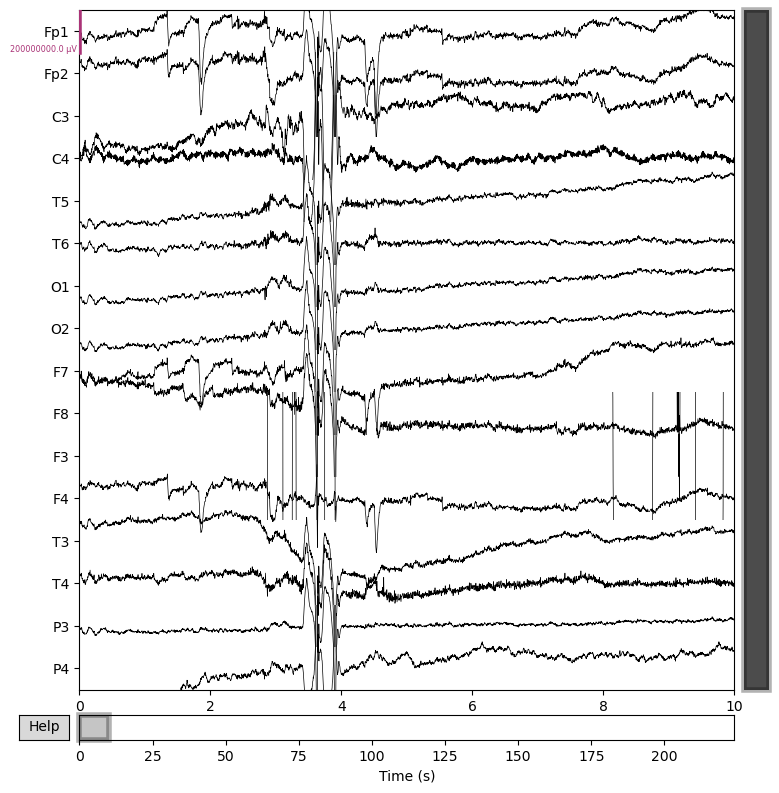

Channels marked as bad:
none
Channels marked as bad:
none


In [27]:
# plotting data
data.plot(scalings={'eeg':100})

In [12]:
# plotting bands 
frequencies = np.arange(7, 30, 3)
power = mne.time_frequency.tfr_morlet(data2, n_cycles=10, return_itc=False,
                                      freqs=frequencies, decim=1)
power.plot()


#power2 = mne.time_frequency.tfr_morlet(testwobaseline, n_cycles=10, return_itc=False,
#                                      freqs=frequencies, decim=1)
#power2.plot()

Using data from preloaded Raw for 7 events and 7500 original time points ...
0 bad epochs dropped


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.2s remaining:    0.0s


No baseline correction applied


[Parallel(n_jobs=1)]: Done  16 out of  16 | elapsed:    0.5s finished


[<Figure size 640x480 with 2 Axes>,
 <Figure size 640x480 with 2 Axes>,
 <Figure size 640x480 with 2 Axes>,
 <Figure size 640x480 with 2 Axes>,
 <Figure size 640x480 with 2 Axes>,
 <Figure size 640x480 with 2 Axes>,
 <Figure size 640x480 with 2 Axes>,
 <Figure size 640x480 with 2 Axes>,
 <Figure size 640x480 with 2 Axes>,
 <Figure size 640x480 with 2 Axes>,
 <Figure size 640x480 with 2 Axes>,
 <Figure size 640x480 with 2 Axes>,
 <Figure size 640x480 with 2 Axes>,
 <Figure size 640x480 with 2 Axes>,
 <Figure size 640x480 with 2 Axes>,
 <Figure size 640x480 with 2 Axes>]

Traceback (most recent call last):
  File "/usr/lib/python3/dist-packages/matplotlib/cbook/__init__.py", line 287, in process
    func(*args, **kwargs)
  File "/usr/lib/python3/dist-packages/matplotlib/widgets.py", line 1958, in release
    self._release(event)
  File "/usr/lib/python3/dist-packages/matplotlib/widgets.py", line 2950, in _release
    self.onselect(self._eventpress, self._eventrelease)
  File "<decorator-gen-316>", line 12, in _onselect
  File "/home/ccarthen/.local/lib/python3.10/site-packages/mne/time_frequency/tfr.py", line 1902, in _onselect
    plot_tfr_topomap(self, ch_type=ch_type, tmin=tmin, tmax=tmax,
TypeError: plot_tfr_topomap() got an unexpected keyword argument 'title'
Traceback (most recent call last):
  File "/usr/lib/python3/dist-packages/matplotlib/cbook/__init__.py", line 287, in process
    func(*args, **kwargs)
  File "/usr/lib/python3/dist-packages/matplotlib/widgets.py", line 1958, in release
    self._release(event)
  File "/usr/lib/python3/dist-pa

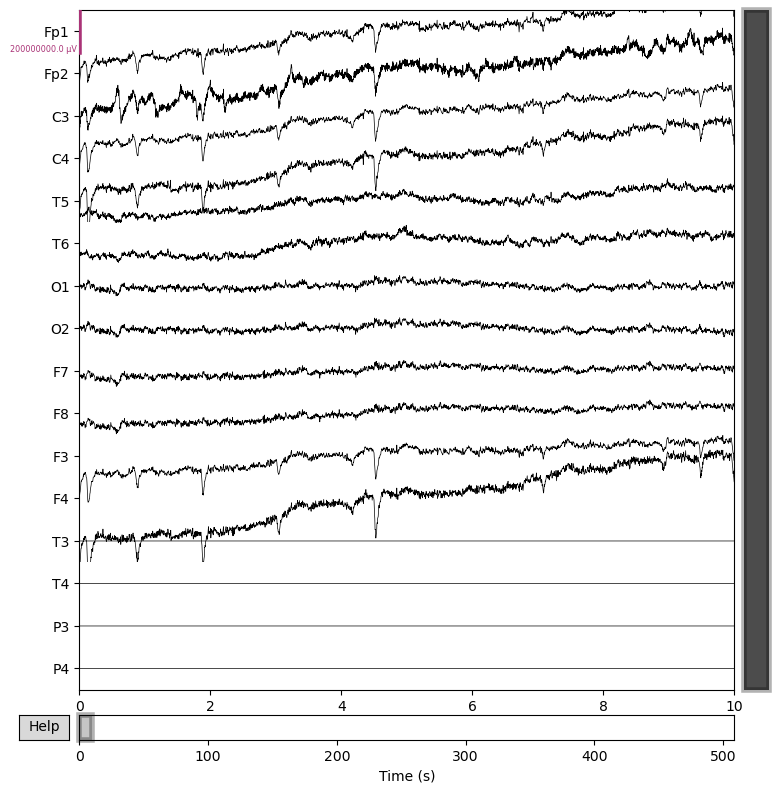

Channels marked as bad:
none


In [26]:
dataf1.plot(scalings={'eeg':100})